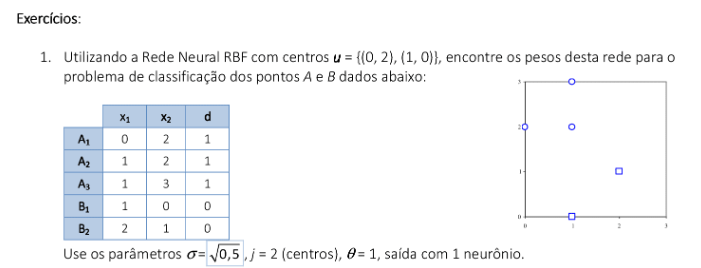

In [1]:
using System.Linq;

//entradas
double[,] x = {
    {0,2},
    {1,2},
    {1,3},
    {1,0},
    {2,1}
};

//valor desejado
double[,] d = {
        {1},{1},{1},{0},{0}
    };

//parametros gerais
int n_linhas= x.GetLength(0);
int n_colunas = x.GetLength(1);
int q_neuronios = 2;
double theta = 1;

Console.WriteLine($"n_linhas:{n_linhas}, n_colunas:{n_colunas}, q_neuronios:{q_neuronios}");
double[,] neuronios = {
   {0,2},
   {1,0}
};
//atribuicao de sigmas
double[] sigmas = new double[q_neuronios];
for(int j= 0; j<q_neuronios;j++){
    sigmas[j] = Math.Sqrt(0.5);
    Console.WriteLine($"sigmas_{j}:{sigmas[j]}");
}

//matriz de ativacoes
double [,] G = new double [n_linhas,q_neuronios+1];

n_linhas:5, n_colunas:2, q_neuronios:2
sigmas_0:0,7071067811865476
sigmas_1:0,7071067811865476


In [2]:
public double[,] CalcularG(double[,] x,int n_linhas,int n_colunas,int q_neuronios,double theta,double[,] neuronios,double[] sigmas,double [,] G){

    for (int i = 0; i < n_linhas; i++){
            for (int j = 0; j < q_neuronios; j++)
            {
                // Passo 4: Calcular ativação de cada neurônio j
                double quadradoDaDistancia = 0.0;
                for (int k = 0; k < n_colunas; k++)
                {
                    quadradoDaDistancia += Math.Pow(x[i, k] - neuronios[j, k], 2);
                }
                double phi = Math.Exp(-1 / (2 * Math.Pow(sigmas[j], 2)) * quadradoDaDistancia);

                // Passo 5: Atribuir valores das ativações dos neurônios na matriz G
                G[i, j] = phi;
            }
            // Adicionar theta à matriz G
            G[i, q_neuronios] = theta;
    }
    return G;
}

In [3]:
// Função para transpor uma matriz
static double[,] Transpor(double[,] G)
{
    int n_linhas = G.GetLength(0);
    int n_colunas = G.GetLength(1);
    double[,] GT = new double[n_colunas, n_linhas];
    for (int i = 0; i < n_colunas; i++)
    {
        for (int j = 0; j < n_linhas; j++)
        {
            GT[i, j] = G[j, i];
        }
    }
    return GT;
}

In [4]:
// Função para multiplicar duas matrizes
    static double[,] MultiplicarMatrizes(double[,] matriz1, double[,] matriz2)
    {
        int n_linhas_matriz1 = matriz1.GetLength(0);
        int n_colunas_matriz1 = matriz1.GetLength(1);
        int n_colunas_matriz2 = matriz2.GetLength(1);
        double[,] matriz_multiplicada = new double[n_linhas_matriz1, n_colunas_matriz2];
        for (int i = 0; i < n_linhas_matriz1; i++)
        {
            for (int j = 0; j < n_colunas_matriz2; j++)
            {
                for (int k = 0; k < n_colunas_matriz1; k++)
                {
                    matriz_multiplicada[i, j] += matriz1[i, k] * matriz2[k, j];
                }
            }
        }
        return matriz_multiplicada;
    }

In [5]:
public static double[,] ObterInversa(double[,] matriz)
{
    int tamanho = matriz.GetLength(0);

    if (tamanho != matriz.GetLength(1))
    {
        throw new ArgumentException("A matriz deve ser quadrada para calcular a inversa.");
    }

    double[,] extendida = new double[tamanho, 2 * tamanho];

    // Copia a matriz original e a matriz identidade para a matriz estendida
    for (int i = 0; i < tamanho; i++)
    {
        for (int j = 0; j < tamanho; j++)
        {
            extendida[i, j] = matriz[i, j];
            extendida[i, j + tamanho] = (i == j) ? 1.0 : 0.0;
        }
    }

    // Pivoteamento parcial
    for (int i = 0; i < tamanho; i++)
    {
        int maxIndex = i;
        double maxAbsValue = Math.Abs(extendida[i, i]);

        for (int k = i + 1; k < tamanho; k++)
        {
            if (Math.Abs(extendida[k, i]) > maxAbsValue)
            {
                maxIndex = k;
                maxAbsValue = Math.Abs(extendida[k, i]);
            }
        }

        // Troca as linhas
        if (maxIndex != i)
        {
            for (int j = 0; j < 2 * tamanho; j++)
            {
                double temp = extendida[i, j];
                extendida[i, j] = extendida[maxIndex, j];
                extendida[maxIndex, j] = temp;
            }
        }

        // Eliminação gaussiana
        for (int k = 0; k < tamanho; k++)
        {
            if (k != i)
            {
                double factor = extendida[k, i] / extendida[i, i];
                for (int j = i; j < 2 * tamanho; j++)
                {
                    extendida[k, j] -= factor * extendida[i, j];
                }
            }
        }
    }

    // Normaliza os pivôs para 1
    for (int i = 0; i < tamanho; i++)
    {
        double divisor = extendida[i, i];
        for (int j = 0; j < 2 * tamanho; j++)
        {
            extendida[i, j] /= divisor;
        }
    }

    // Extrai a matriz inversa da parte direita da matriz estendida
    double[,] inversa = new double[tamanho, tamanho];
    for (int i = 0; i < tamanho; i++)
    {
        for (int j = 0; j < tamanho; j++)
        {
            inversa[i, j] = extendida[i, j + tamanho];
        }
    }

    return inversa;
}


In [6]:
public void PrintarMatriz(double[,] G, string descricao){
    
    Console.WriteLine($"==================================================");
    Console.WriteLine($"===================={descricao}===================");
    int n_linhas = G.GetLength(0);
    int n_colunas = G.GetLength(1);
    Console.WriteLine($"=================={n_linhas} linhas e {n_colunas} colunas ===================");

    for (int i = 0; i < n_linhas; i++)
    {
        for (int j = 0; j < n_colunas; j++)
        {
             Console.WriteLine($"G_{i+1}_{j+1}:{G[i,j]}");
        }
    }
}

In [7]:
public double ErroQuadrado(double[,] w, double[,] G, double[,] d){
    
    Console.WriteLine($"==================================================");
    Console.WriteLine($"====================Iniciando Calculo do Erro===================");
    Console.WriteLine($"==================================================");

    int n_linhas = G.GetLength(0);
    int n_colunas= G.GetLength(1);
    double erroQuadradoTotal = 0;
    for (int i = 0; i < n_linhas; i++){
        double y = 0.0;
        for (int j = 0; j < n_colunas; j++)
        {
            y += w[j,0] * G[i, j];
        }
        Console.WriteLine($"Saída para o exemplo {i+1}: {y}");

        double erroQuadrado = Math.Pow(d[i,0]-y,2)/2;
        Console.WriteLine($"Erro entrada {i+1}: {erroQuadrado}");
        erroQuadradoTotal+=erroQuadrado;
    }
    return erroQuadradoTotal;
}
        

In [8]:
G= CalcularG(x ,n_linhas, n_colunas, q_neuronios, theta, neuronios, sigmas, G);
PrintarMatriz(G,"printando matriz G");
var GT = Transpor(G);
PrintarMatriz(GT, "printando matriz GT");
var GTG = MultiplicarMatrizes(GT,G);
PrintarMatriz(GTG, "printando matriz GTG");
var GTG_INV = ObterInversa(GTG);
PrintarMatriz(GTG_INV, "printando matriz GTG_INV");
var GTG_INV_GT = MultiplicarMatrizes(GTG_INV,GT);
PrintarMatriz(GTG_INV_GT, "printando matriz GTG_INV_GT");
var W = MultiplicarMatrizes(GTG_INV_GT,d);
PrintarMatriz(W, "printando vetor W");
var erro = ErroQuadrado(W, G, d);
Console.WriteLine($"Erro Quadrado Final: {erro}")

====================printando matriz G===================
==================5 linhas e 3 colunas ===================
G_1_1:1
G_1_2:0,006737946999085473
G_1_3:1
G_2_1:0,3678794411714424
G_2_2:0,018315638888734196
G_2_3:1
G_3_1:0,13533528323661276
G_3_2:0,00012340980408667978
G_3_3:1
G_4_1:0,006737946999085473
G_4_2:1
G_4_3:1
G_5_1:0,006737946999085473
G_5_2:0,13533528323661276
G_5_3:1
====================printando matriz GT===================
==================3 linhas e 5 colunas ===================
G_1_1:1
G_1_2:0,3678794411714424
G_1_3:0,13533528323661276
G_1_4:0,006737946999085473
G_1_5:0,006737946999085473
G_2_1:0,006737946999085473
G_2_2:0,018315638888734196
G_2_3:0,00012340980408667978
G_2_4:1
G_2_5:0,13533528323661276
G_3_1:1
G_3_2:1
G_3_3:1
G_3_4:1
G_3_5:1
====================printando matriz GTG===================
==================3 linhas e 3 colunas ===================
G_1_1:1,153741721984872
G_1_2:0,021142424663601184
G_1_3:1,5166906184062259
G_2_1:0,021142424663601184
G_2